# 1) Data Exploration, Preprocessing, and Feature Engineering -
    The dataset is cleaned and analyzed using pandas, with new features engineered to enhance data quality and analytical depth.
---

### 1> Load the dataset into a pandas DataFrame and analyze its structure (rows and columns).

In [58]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

In [59]:
print("--- Top 5 Dataset ---")
df.head()

--- Top 5 Dataset ---


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
print('--- Shape of the Dataframe is ---')
df.shape

--- Shape of the Dataframe is ---


(200, 5)

### 2> Load the dataset into a pandas DataFrame and analyze its structure (rows and columns).

In [61]:
print('--- Data Types ---')
df.dtypes

--- Data Types ---


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### 3> Handle missing data if any are present, ensuring that the dataset is clean and ready for further analysis.

In [62]:
print('--- Check for Missing Values: ---')
df.isna().sum()

--- Check for Missing Values: ---


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4> Explore categorical features, such as the 'Gender' column, to understand their distribution and how they can be utilized.

In [63]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

### 5> Create engineered features that can provide better insights for subsequent analysis:

- income_to_spending: This feature will be created by dividing the Annual Income (in k$) by the Spending Score (from 1-100).
- age_income_ratio: This new feature will be the ratio of a customer's age to their annual income (in k$), which might reveal patterns related to different customer demographics.

In [64]:
df['income_to_spending'] = df['Annual Income (k$)']/df['Spending Score (1-100)']

In [65]:
df['age_income_ratio'] = df['Age']/df['Annual Income (k$)']

In [66]:
print("--- New Columns Added ---")
df[['income_to_spending','age_income_ratio',]].head(7)

--- New Columns Added ---


,income_to_spending,age_income_ratio
0,0.384615,1.266667
1,0.185185,1.400000
2,2.666667,1.250000
3,0.207792,1.437500
4,0.425000,1.823529
5,0.223684,1.294118
6,3.000000,1.944444


# 2) K-Means Clustering and Evaluation
---

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df.columns.tolist()

['CustomerID',
 'Gender',
 'Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'income_to_spending',
 'age_income_ratio']

In [69]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
X = df[features]

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
inertias, silhouettes = [], []
k_range = range(2,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, km.labels_))

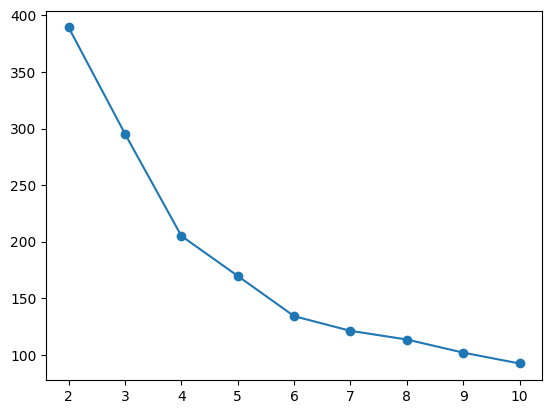

In [72]:
plt.plot(k_range,inertias,marker='o')

In [73]:
best_k_index = silhouettes.index(max(silhouettes))
best_k = k_range[best_k_index]
print("Best K by Silhouettes score: ",best_k)

Best K by Silhouettes score:  6


In [74]:
km = KMeans(n_clusters=best_k,random_state=42,n_init='auto')
labels = km.fit_predict(X_scaled)

In [75]:
X_scaled = pd.DataFrame(X_scaled,columns=features)

In [76]:
visual_df = X_scaled.copy()

In [77]:
visual_df['cluster'] = labels
visual_df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,5
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,5


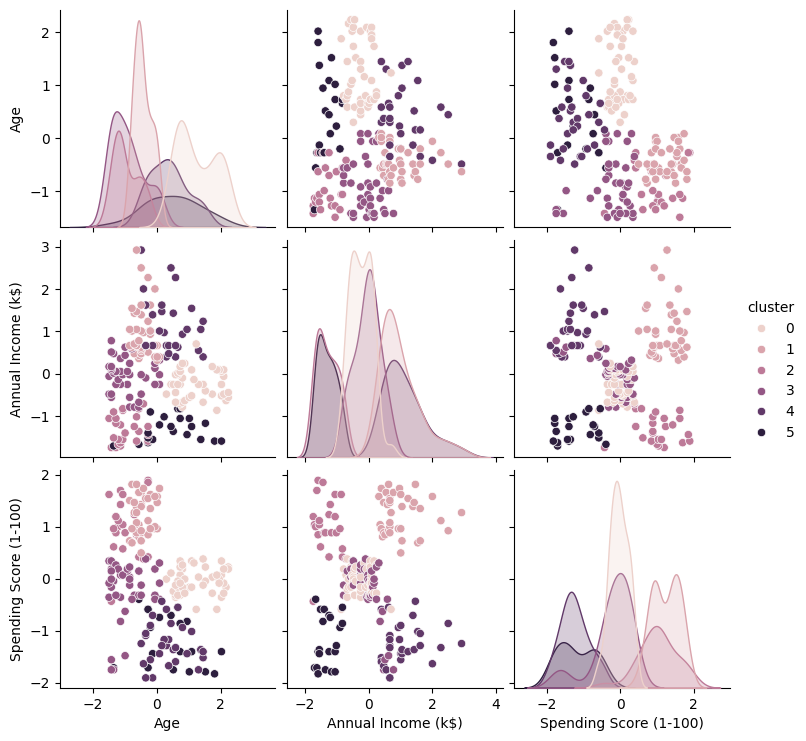

In [81]:
sns.pairplot(visual_df, vars=['Age','Annual Income (k$)','Spending Score (1-100)'], hue='cluster')


---

# PCA for Dimensionality Reduction + Classification
--->

In [84]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

1. Load the MNIST Digits dataset: This dataset contains images of
handwritten digits, where each image is a 64-dimensional
vector (8 x 8 pixels). We will flatten these images to a vector
format and examine the dataset's shape.

In [87]:
digits = load_digits()
X,y = digits.data,digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
print("--- Origianl Data Shape ---")
X_train.shape

--- Origianl Data Shape ---


(1257, 64)

2. Apply PCA: We will apply PCA to reduce the dimensionality of
the data, aiming to retain 95% of the total variance. The
number of principal components chosen will give us insight into
how much information is captured in a reduced feature space.

In [89]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('--- PCA Reduced Shape ---')
X_train_pca.shape

--- PCA Reduced Shape ---


(1257, 28)


3. Train a classifier: We will train a Logistic Regression classifier:

o First, we will train it on the original high-dimensional data.

o Then, we will train it on the PCA-reduced data.


In [91]:
clf = LogisticRegression(max_iter=2000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [94]:
clf2 = LogisticRegression(max_iter=2000, random_state=42)
clf2.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2000, random_state=42)

4. Evaluate model performance: We will compare the accuracy of
the classifier on both the original and PCA-reduced data to see
how much of the data's dimensionality we can reduce without
sacrificing performance.

In [93]:
score = clf.score(X_test,y_test)
print("--- Accuracy On original data ---",score)

--- Accuracy On original data --- 0.9574074074074074


In [96]:
score = clf2.score(X_test_pca,y_test)
print("--- Accuracy On PCA reduced data ---",score)

--- Accuracy On PCA reduced data --- 0.9537037037037037







5. Plot the cumulative explained variance ratio: To better
understand the impact of dimensionality reduction, we will plot
the cumulative explained variance ratio versus the number of
components. This will help visualize how much information is
ained as we reduce the number of dimensions.

In [98]:
pca_full = PCA()
pca_full.fit(X_train)

PCA()

In [99]:
cummulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
cummulative_variance

array([0.14620299, 0.28290769, 0.40130046, 0.49069578, 0.54726587,
       0.59558923, 0.63762818, 0.67359586, 0.70772108, 0.73782541,
       0.76133907, 0.78453906, 0.80306577, 0.8204735 , 0.83514544,
       0.84974902, 0.86297503, 0.87531375, 0.88565118, 0.89452369,
       0.90315393, 0.91120676, 0.91891914, 0.9262361 , 0.933169  ,
       0.93929593, 0.94508008, 0.95008633, 0.95498867, 0.95936573,
       0.96313821, 0.96673163, 0.96998457, 0.97316197, 0.97621616,
       0.97914612, 0.98177322, 0.98406805, 0.98629216, 0.98843924,
       0.99031589, 0.99189207, 0.99339807, 0.99478186, 0.99591931,
       0.99694408, 0.99782822, 0.99861836, 0.99917747, 0.99958828,
       0.99977624, 0.99985843, 0.99991258, 0.9999539 , 0.99998547,
       0.9999926 , 0.9999975 , 0.9999987 , 0.99999937, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

PCA, a key technique in data science and machine learning for reducing the complexity of high-dimensional data. This also sets the foundation for understanding how dimensionality reduction can help in improving model efficiency and performance. This final part completes the series, combining unsupervised learning (from the previous parts) with supervised classification, preparing you for real-world applications.